In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import glob 

In [5]:
flist = glob.glob("quantification/*.csv")
flist

['quantification/SK296-new-1-7.csv',
 'quantification/SK295-1-8.csv',
 'quantification/SK276-BV-1-2.csv',
 'quantification/SK287-1-5.csv',
 'quantification/SK276-DMSO-1-1.csv',
 'quantification/SK285-1-4.csv',
 'quantification/SK294-new-1-6.csv',
 'quantification/SK305-new-1-9.csv',
 'quantification/SK284-new-1-3.csv']

In [6]:
genotypes = ["HO1 PcyA","tFnr-Fd PcyA","BV","PcyA","DMSO","tFnr-Fd","HO1 tFnr-fd","HO1 tFnr-Fd PcyA","HO1"]
orders = [7,8,2,5,1,4,6,9,3]
flist = glob.glob("quantification/*.csv")
df = pd.DataFrame()
for file,genotype,order in zip(flist, genotypes, orders):
    file_tmp = pd.read_csv(file,index_col=0)
    file_tmp["sample"] = file[15:-4]
    file_tmp["genotype"] = genotype
    file_tmp["order"] = order
    df = pd.concat([df,file_tmp])
df = df.reset_index(drop = True)
df2 = df.sort_values('order')
df2

Mean          sample          genotype  order
224    54.246  SK276-DMSO-1-1              DMSO      1
228    54.739  SK276-DMSO-1-1              DMSO      1
229    59.014  SK276-DMSO-1-1              DMSO      1
230    64.754  SK276-DMSO-1-1              DMSO      1
231    57.623  SK276-DMSO-1-1              DMSO      1
..        ...             ...               ...    ...
377  8089.623   SK305-new-1-9  HO1 tFnr-Fd PcyA      9
376  5056.667   SK305-new-1-9  HO1 tFnr-Fd PcyA      9
375  5912.797   SK305-new-1-9  HO1 tFnr-Fd PcyA      9
385  6749.391   SK305-new-1-9  HO1 tFnr-Fd PcyA      9
399  6208.435   SK305-new-1-9  HO1 tFnr-Fd PcyA      9

[450 rows x 4 columns]

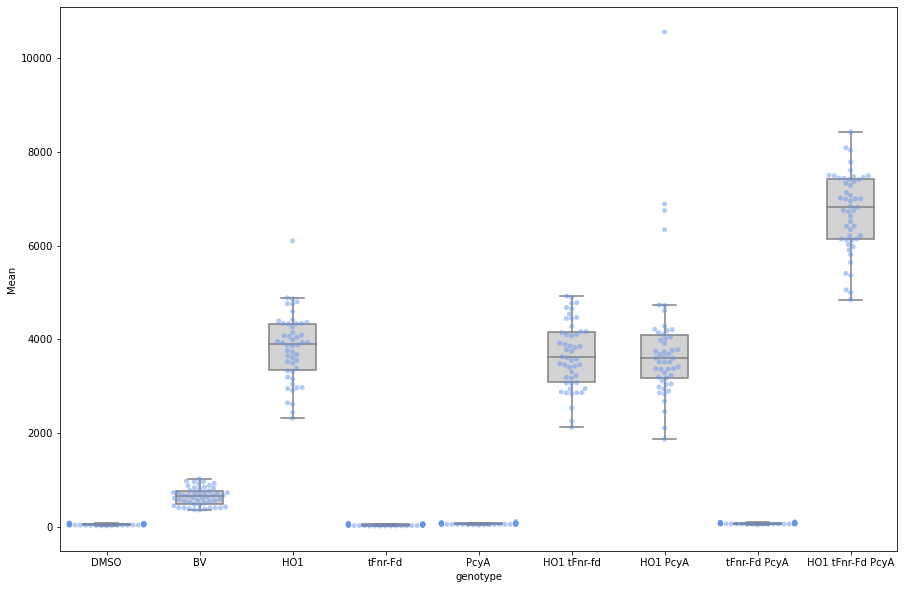

In [7]:
plt.figure(figsize=(15,10))
plt.rcParams['pdf.fonttype'] = 42
sns.boxplot(data=df2[df2["genotype"]!="synPCB2.1"], x='genotype', y='Mean', color ='lightgrey',fliersize=0 , width=0.5)
sns.swarmplot(x="genotype", y="Mean", data=df2[df2["genotype"]!="synPCB2.1"], color="cornflowerblue", size=5, alpha =0.5)
#plt.savefig("HO1-Fnr-PcyA-2.pdf")